# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

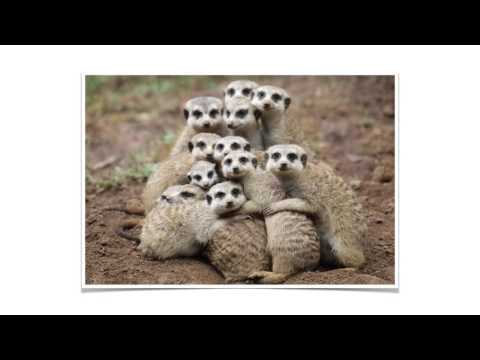

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

> **Answer:** The problem is that random networks do not allow for outliers of hubs (nodes with a lot of connections, much more than average) or nodes with very few connections, which in reality exist in a lot of cases.

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

> **Answer:** 
> - Subcritical regime: $\langle k \rangle < 1$
> - Critical point: $\langle k \rangle = 1$
> - Supercritical regime: $\langle k \rangle > 1$
> - Connected regime: $\langle k \rangle > ln(N)$

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

> **Answer:** Because then, random networks cannot model real networks.

<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
graph1 = nx.watts_strogatz_graph(500, 4, 0)
graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph3 = nx.watts_strogatz_graph(500, 4, 1)

In [4]:
d1s = nx.average_shortest_path_length(graph1)
d2s = nx.average_shortest_path_length(graph2)
d3s = nx.average_shortest_path_length(graph3)
print(f"Average shortest path length of graph1 (p=0): {d1s}")
print(f"Average shortest path length of graph2 (p=0.1): {d2s}")
print(f"Average shortest path length of graph3 (p=1): {d3s}")

Average shortest path length of graph1 (p=0): 62.875751503006015
Average shortest path length of graph2 (p=0.1): 7.970773547094188
Average shortest path length of graph3 (p=1): 4.799783567134268


In [5]:
import numpy as np
import networkx as nx
from tqdm import tqdm
from pathos.multiprocessing import ProcessingPool

def process_graph(args):
    i, p = args
    G = nx.watts_strogatz_graph(500, 4, p)
    return (f"graph_{i}", (nx.average_shortest_path_length(G), p))

# Generate random probabilities
np.random.seed(42)
probabilities = np.random.rand(10000)
args = list(enumerate(probabilities))

# Use pathos for better compatibility
with ProcessingPool() as pool:
    results = list(tqdm(
        pool.imap(process_graph, args),
        total=len(args),
        desc="Processing graphs"
    ))

net_dict = dict(results)

Processing graphs:  83%|████████▎ | 8258/10000 [01:28<00:18, 93.29it/s] 
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/graphs/lib/python3.11/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/envs/graphs/lib/python3.11/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/anaconda3/envs/graphs/lib/python3.11/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/graphs/lib/python3.11/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._ar

KeyboardInterrupt: 

In [ ]:
n, k = 500, 4
G_rand = nx.watts_strogatz_graph(n, k, 1.0)
asp_random = nx.average_shortest_path_length(G_rand)
print("Random graph ASP:", asp_random)

Random graph ASP: 4.745555110220441


In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(net_dict, orient="index", columns=["asp", "p"])

# Compute how close each ASP is to the fully random one
df["diff"] = (df["asp"] - asp_random).abs()

# Find the p value where ASP is closest to the random case
best_row = df.loc[df["diff"].idxmin()]
print("Closest p:", best_row.p, "ASP:", best_row.asp)

Closest p: 0.9000231233980112 ASP: 4.745579158316633


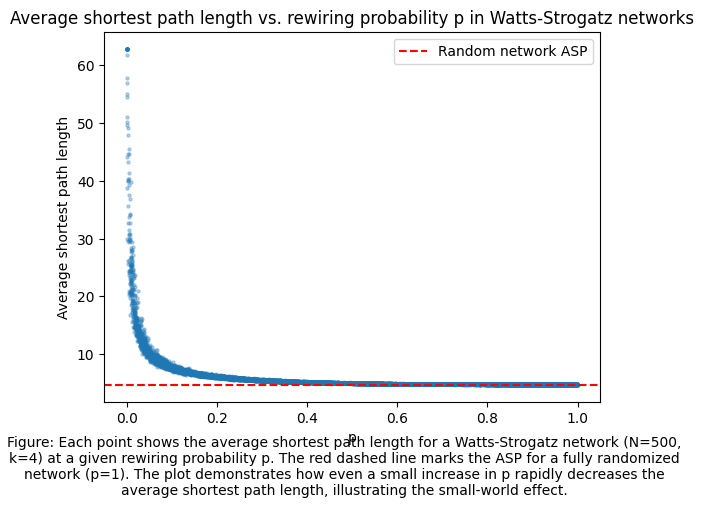

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["p"], df["asp"], s=5, alpha=0.3)
plt.axhline(asp_random, color="r", linestyle="--", label="Random network ASP")
plt.xlabel("p")
plt.ylabel("Average shortest path length")
plt.legend()
plt.title("Average shortest path length vs. rewiring probability p in Watts-Strogatz networks")
plt.figtext(0.5, -0.08,
    "Figure: Each point shows the average shortest path length for a Watts-Strogatz network (N=500, k=4) at a given rewiring probability p. "
    "The red dashed line marks the ASP for a fully randomized network (p=1). "
    "The plot demonstrates how even a small increase in p rapidly decreases the average shortest path length, illustrating the small-world effect.",
    wrap=True, ha='center', fontsize=10)
plt.show()


## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

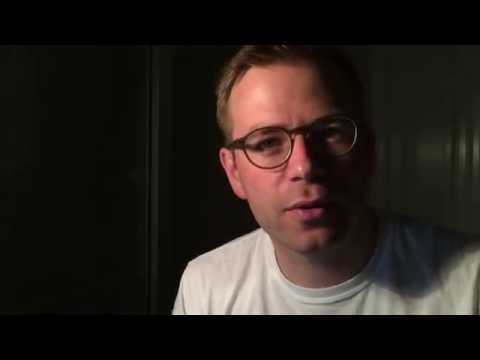

In [ ]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

> **Answer:** 

**Anomalous Regime (γ≤ 2)**
The number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, hence it will run out of nodes to connect to. 

**Scale-Free Regime (2 ‹ γ ‹ 3)**
In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as N → ∞. Consequently scalefree networks in this regime are ultra-small. The kmax grows with the size of the network with exponent 1/(γ - 1), which is smaller than one. Hence the market share of the largest hub, kmax / N, representing the fraction of nodes that connect to it, decreases as kmax/N ~ N-(γ-2)/(γ-1).

**Random Network Regime (γ › 3)**
For γ > 3 both the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size. 

> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

> **Answer:**

**Sub-linear regime (0 < a < 1)**
- Attachment grows slower than linearly.  
- Popular nodes attract more links, but not overwhelmingly so.  
- Degree distribution: *stretched exponential*.  
- Network is relatively homogeneous, no dominant hubs.  

---

**Linear regime (a = 1)**
- This corresponds to the classic **Barabási–Albert model**.  
- Degree distribution: power law $(P(k) \sim k^{-3})$.  
- Network is *scale-free*, with hubs emerging naturally.  

---

**Super-linear regime (a > 1)**
- Attachment grows faster than linearly.  
- High-degree nodes attract new links **disproportionately**.  
- Leads to *condensation*: one (or a few) nodes capture almost all edges.  
- Degree distribution deviates from a pure power law.  


> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

=== Barabási-Albert Model Implementation ===

Initial network: nodes = [0, 1], edges = [(0, 1)]
Network size: 2 nodes, 1 edges



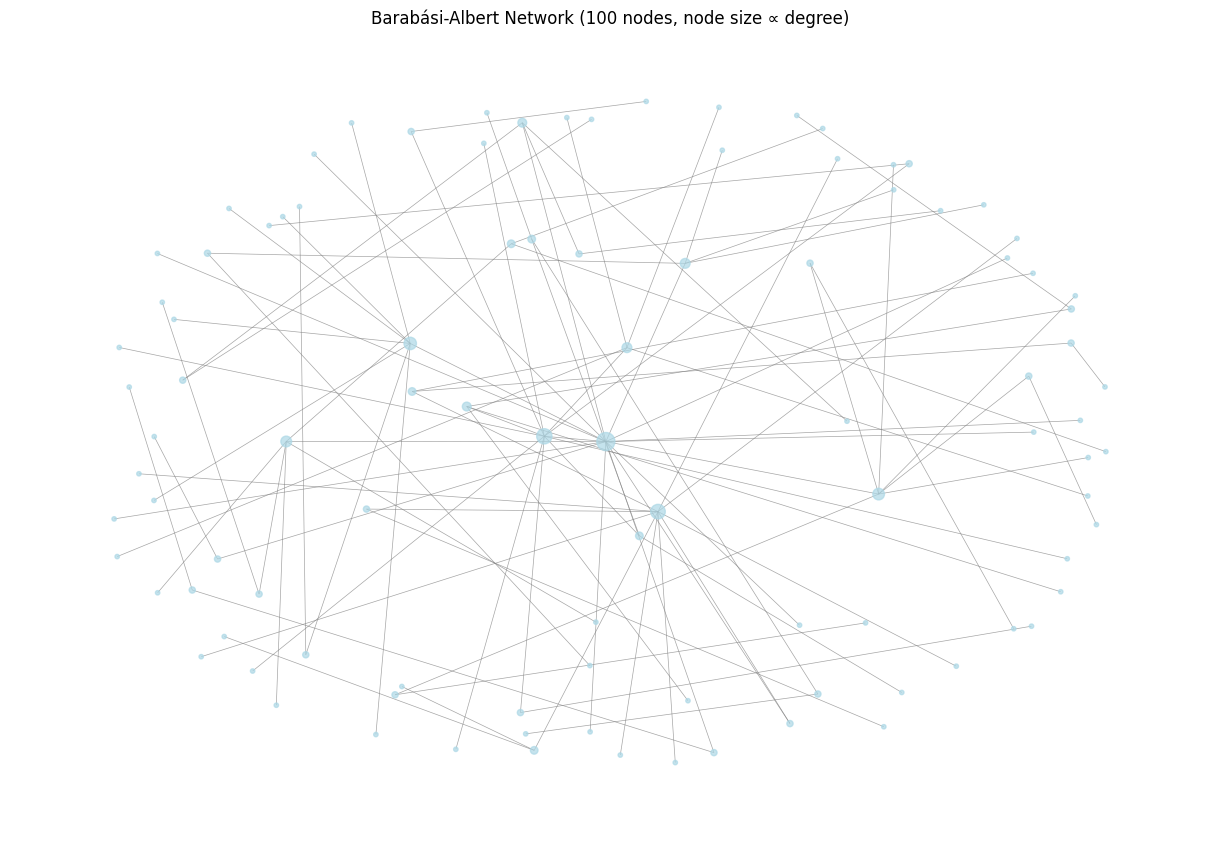


Step 4: Growing network to 5000 nodes...
  Progress: 500 nodes...
  Progress: 1000 nodes...
  Progress: 1500 nodes...
  Progress: 2000 nodes...
  Progress: 2500 nodes...
  Progress: 3000 nodes...
  Progress: 3500 nodes...
  Progress: 4000 nodes...
  Progress: 4500 nodes...
Final network: 5000 nodes, 4999 edges

Step 5: Calculating degree statistics...
Minimum degree: 1
Maximum degree: 163
Average degree: 2.00
Standard deviation: 3.80

Step 6: Creating degree distribution...
Degree distribution calculated with 50 bins
Non-zero bins for log-log plot: 16

Step 7: Plotting degree distributions...


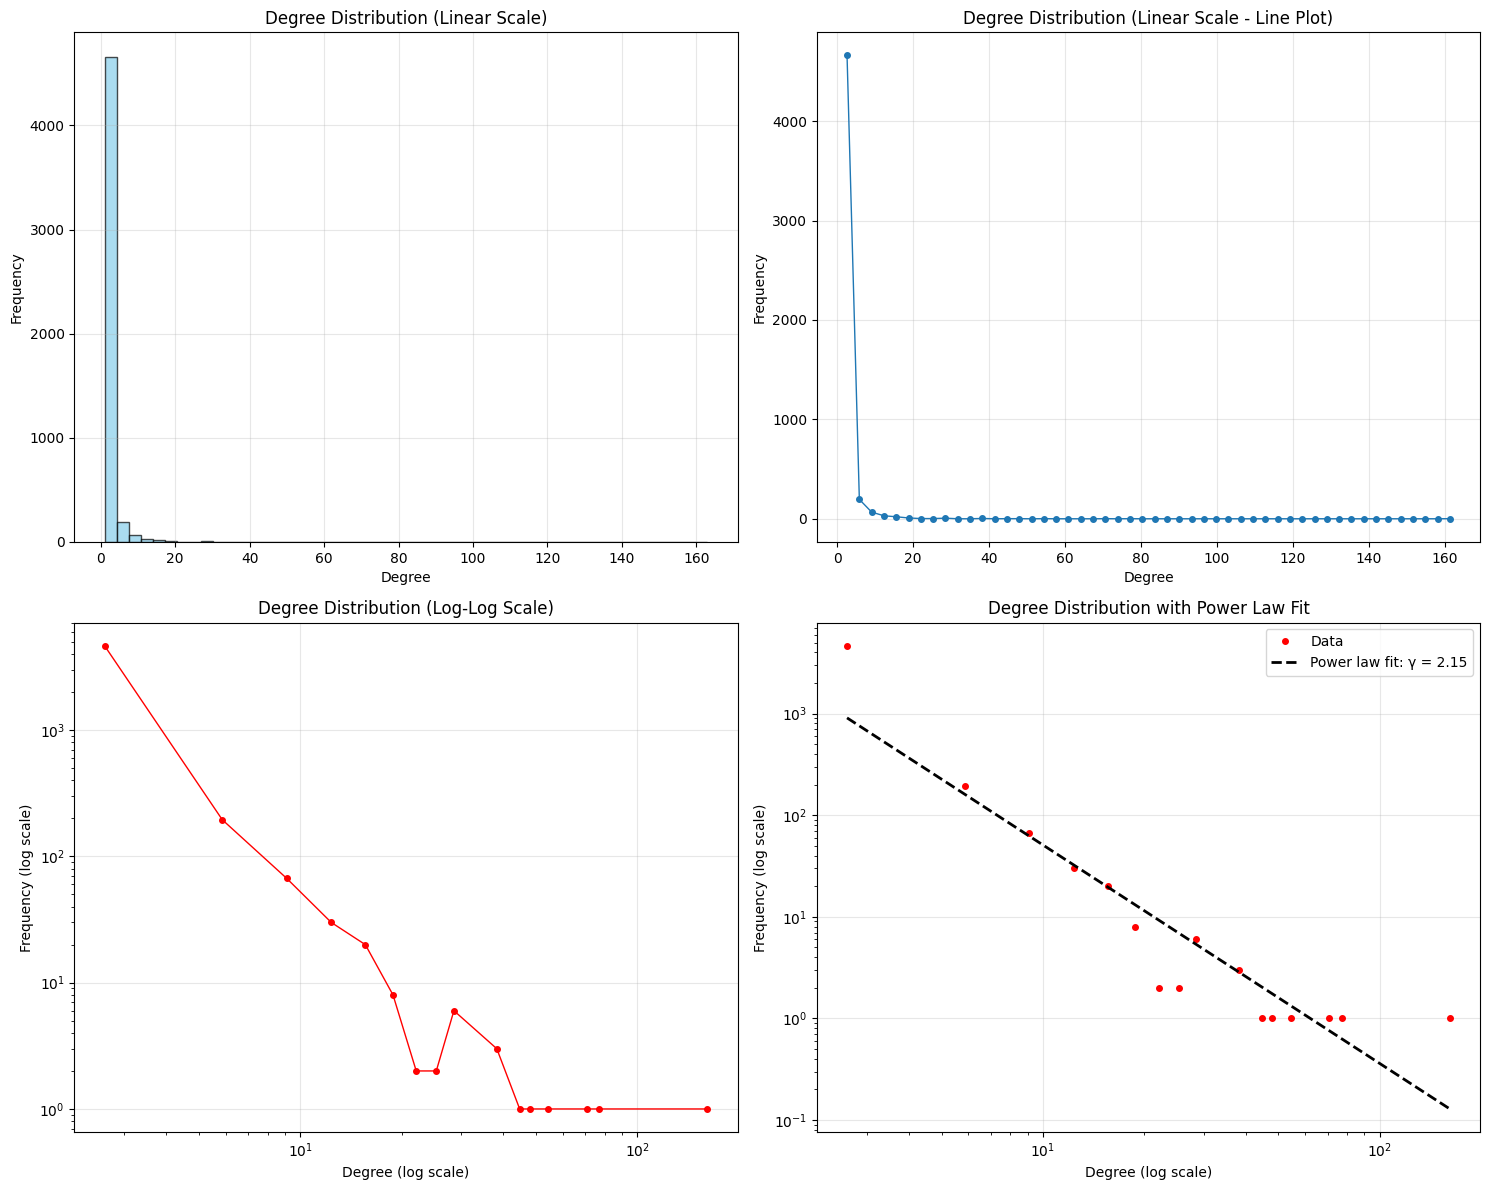


Power law analysis:
Estimated power law exponent γ = 2.151
Theoretical expectation for BA model: γ ≈ 3

Additional network statistics:
Network density: 0.000400
Total edges: 4999
Expected edges for tree: 4999

Degree distribution summary:
Nodes with degree 1: 3358
Nodes with degree > 10: 77
Nodes with degree > 100: 1

=== Barabási-Albert Model Complete ===


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import networkx as nx

# Set random seed for reproducibility
# random.seed(42)
# np.random.seed(42)

print("=== Barabási-Albert Model Implementation ===\n")

# Step 1: Create initial graph with a single link
nodes = [0, 1]
edges = [(0, 1)]
print(f"Initial network: nodes = {nodes}, edges = {edges}")
print(f"Network size: {len(nodes)} nodes, {len(edges)} edges\n")

# Step 2: Add nodes one by one up to 100 nodes

def add_node_preferential_attachment(nodes, edges, new_node_id):
    """Add a new node with preferential attachment"""
    # Create flat list of all nodes in edges (each appears proportional to degree)
    flat_node_list = []
    for edge in edges:
        flat_node_list.append(edge[0])
        flat_node_list.append(edge[1])
    
    # Select random node from flat list (this gives preferential attachment)
    selected_node = random.choice(flat_node_list)
    
    # Add new node and edge
    nodes.append(new_node_id)
    edges.append((new_node_id, selected_node))
    
    return nodes, edges

# Grow to 100 nodes
target_size_100 = 100
for i in range(2, target_size_100):
    nodes, edges = add_node_preferential_attachment(nodes, edges, i)

# Step 3: Plot the network (100 nodes)

# Create NetworkX graph for visualization
G_100 = nx.Graph()
G_100.add_nodes_from(nodes)
G_100.add_edges_from(edges)

# Calculate degree for each node
node_degrees = dict(G_100.degree())
node_sizes = [node_degrees[n]*10 for n in G_100.nodes()]  # scale factor 10 for visibility

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_100, k=1, iterations=50)
nx.draw(G_100, pos, node_size=node_sizes, node_color='lightblue', 
    edge_color='gray', alpha=0.7, width=0.5)
plt.title("Barabási-Albert Network (100 nodes, node size ∝ degree)")
plt.axis('off')
plt.show()

# Step 4: Extend to 5000 nodes
print("\nStep 4: Growing network to 5000 nodes...")
target_size_5000 = 5000

for i in range(target_size_100, target_size_5000):
    nodes, edges = add_node_preferential_attachment(nodes, edges, i)
    
    # Progress indicator
    if i % 500 == 0:
        print(f"  Progress: {i} nodes...")

print(f"Final network: {len(nodes)} nodes, {len(edges)} edges")

# Step 5: Calculate degree statistics
print("\nStep 5: Calculating degree statistics...")

# Calculate degrees
degrees = defaultdict(int)
for edge in edges:
    degrees[edge[0]] += 1
    degrees[edge[1]] += 1

degree_values = list(degrees.values())
min_degree = min(degree_values)
max_degree = max(degree_values)

print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {np.mean(degree_values):.2f}")
print(f"Standard deviation: {np.std(degree_values):.2f}")

# Step 6: Create degree distribution using numpy.histogram
print("\nStep 6: Creating degree distribution...")

# Use numpy.histogram to bin the degree distribution
hist, bin_edges = np.histogram(degree_values, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Filter out zero counts for log-log plot
nonzero_mask = hist > 0
hist_nonzero = hist[nonzero_mask]
bin_centers_nonzero = bin_centers[nonzero_mask]

print(f"Degree distribution calculated with {len(hist)} bins")
print(f"Non-zero bins for log-log plot: {len(hist_nonzero)}")

# Step 7: Plot the distributions
print("\nStep 7: Plotting degree distributions...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Linear scale histogram
ax1.bar(bin_centers, hist, width=np.diff(bin_edges), alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Degree Distribution (Linear Scale)')
ax1.grid(True, alpha=0.3)

# Linear scale line plot
ax2.plot(bin_centers, hist, 'o-', markersize=4, linewidth=1)
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_title('Degree Distribution (Linear Scale - Line Plot)')
ax2.grid(True, alpha=0.3)

# Log-log scale
ax3.loglog(bin_centers_nonzero, hist_nonzero, 'o-', markersize=4, linewidth=1, color='red')
ax3.set_xlabel('Degree (log scale)')
ax3.set_ylabel('Frequency (log scale)')
ax3.set_title('Degree Distribution (Log-Log Scale)')
ax3.grid(True, alpha=0.3)

# Log-log with power law fit
# Fit power law: y = a * x^(-gamma)
log_x = np.log10(bin_centers_nonzero)
log_y = np.log10(hist_nonzero)
coeffs = np.polyfit(log_x, log_y, 1)
gamma = -coeffs[0]  # Power law exponent
a = 10**coeffs[1]   # Normalization constant

# Generate fit line
x_fit = np.logspace(np.log10(min(bin_centers_nonzero)), np.log10(max(bin_centers_nonzero)), 100)
y_fit = a * x_fit**(-gamma)

ax4.loglog(bin_centers_nonzero, hist_nonzero, 'o', markersize=4, label='Data', color='red')
ax4.loglog(x_fit, y_fit, '--', linewidth=2, label=f'Power law fit: γ = {gamma:.2f}', color='black')
ax4.set_xlabel('Degree (log scale)')
ax4.set_ylabel('Frequency (log scale)')
ax4.set_title('Degree Distribution with Power Law Fit')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPower law analysis:")
print(f"Estimated power law exponent γ = {gamma:.3f}")
print(f"Theoretical expectation for BA model: γ ≈ 3")

# Additional analysis
print(f"\nAdditional network statistics:")
print(f"Network density: {2 * len(edges) / (len(nodes) * (len(nodes) - 1)):.6f}")
print(f"Total edges: {len(edges)}")
print(f"Expected edges for tree: {len(nodes) - 1}")

# Show degree distribution summary
print(f"\nDegree distribution summary:")
print(f"Nodes with degree 1: {sum(1 for d in degree_values if d == 1)}")
print(f"Nodes with degree > 10: {sum(1 for d in degree_values if d > 10)}")
print(f"Nodes with degree > 100: {sum(1 for d in degree_values if d > 100)}")

print("\n=== Barabási-Albert Model Complete ===")

# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [ ]:
import random

G_FBA = nx.Graph()
G_FBA.add_nodes_from(nodes)
G_FBA.add_edges_from(edges)

paradox_count = 0
num_trials = 10000

for _ in range(num_trials):
    node = random.choice(list(G_FBA.nodes))
    node_deg = G_FBA.degree(node)
    neighbors = list(G_FBA.neighbors(node))
    if neighbors:
        avg_neighbor_deg = sum(G_FBA.degree(n) for n in neighbors) / len(neighbors)
        if avg_neighbor_deg > node_deg:
            paradox_count += 1

print(f"Friendship paradox is true in {paradox_count} out of {num_trials} trials ({paradox_count/num_trials:.2%})")

Friendship paradox is true in 8605 out of 10000 trials (86.05%)


*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

In [99]:
import networkx as nx
import numpy as np
import random

k = 2  # Exponent for power law
n = 5000
x_min = 1  # Minimum degree

# Generate degree sequence using transformation method
deg_seq = [int(x_min * (1 - np.random.uniform(0, 1)) ** (-1 / (k - 1))) for _ in range(n)]

# Ensure sum of degrees is even
if np.sum(deg_seq) % 2 != 0:
    deg_seq[random.randint(0, n - 1)] += 1

G = nx.configuration_model(deg_seq)

paradox_count = 0
num_trials = 10000

for _ in range(num_trials):
    node = random.choice(list(G.nodes))
    node_deg = G.degree(node)
    neighbors = list(G.neighbors(node))
    if neighbors:
        avg_neighbor_deg = sum(G.degree(n) for n in neighbors) / len(neighbors)
        if avg_neighbor_deg > node_deg:
            paradox_count += 1

print(f"Friendship paradox is true in {paradox_count} out of {num_trials} trials ({paradox_count/num_trials:.2%}) for configuration model graph with exponent {k}")

Friendship paradox is true in 9792 out of 10000 trials (97.92%) for configuration model graph with exponent 2



*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


In [101]:
k = 2.151  # Exponent for power law
n = 5000
x_min = 1  # Minimum degree

# Generate degree sequence using transformation method
deg_seq = [int(x_min * (1 - np.random.uniform(0, 1)) ** (-1 / (k - 1))) for _ in range(n)]

# Ensure sum of degrees is even
if np.sum(deg_seq) % 2 != 0:
    deg_seq[random.randint(0, n - 1)] += 1

G_FBA_n = nx.configuration_model(deg_seq)

paradox_count = 0
num_trials = 10000

for _ in range(num_trials):
    node = random.choice(list(G_FBA_n.nodes))
    node_deg = G_FBA_n.degree(node)
    neighbors = list(G_FBA_n.neighbors(node))
    if neighbors:
        avg_neighbor_deg = sum(G_FBA_n.degree(n) for n in neighbors) / len(neighbors)
        if avg_neighbor_deg > node_deg:
            paradox_count += 1

print(f"Friendship paradox is true in {paradox_count} out of {num_trials} trials ({paradox_count/num_trials:.2%}) for configuration model graph with exponent {k}")

Friendship paradox is true in 9534 out of 10000 trials (95.34%) for configuration model graph with exponent 2.151


Parameters: n = 5000, m = 3, R = 50, permutations = 5000

BA: mean=0.90157, std=0.00366, se=0.00052, 95% CI=(0.90056, 0.90259)
CM: mean=0.89671, std=0.00312, se=0.00044, 95% CI=(0.89584, 0.89757)
Diff (BA - CM): mean=0.00486, std=0.00410, se=0.00058, 95% CI=(0.00373, 0.00600)

Paired permutation test (two-sided) p-value for mean difference = 0.00000e+00

Average time per pair: 0.10 s, total time: 5.23 s


/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5599/2032519387.py:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([p_ba_arr, p_cm_arr], labels=["F-BA", "F-CM"])


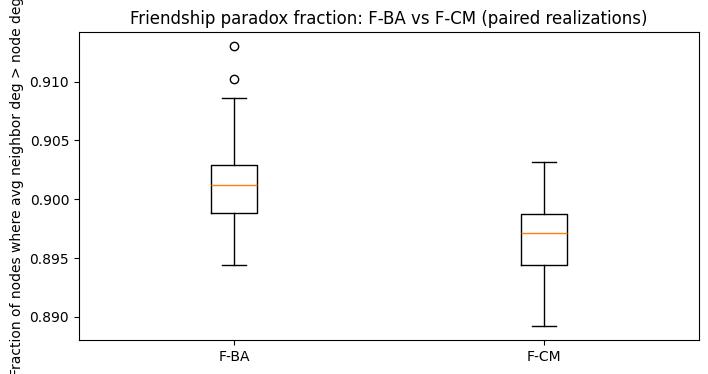

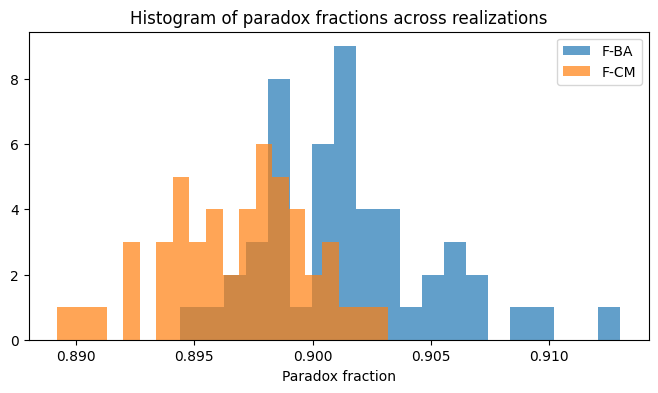

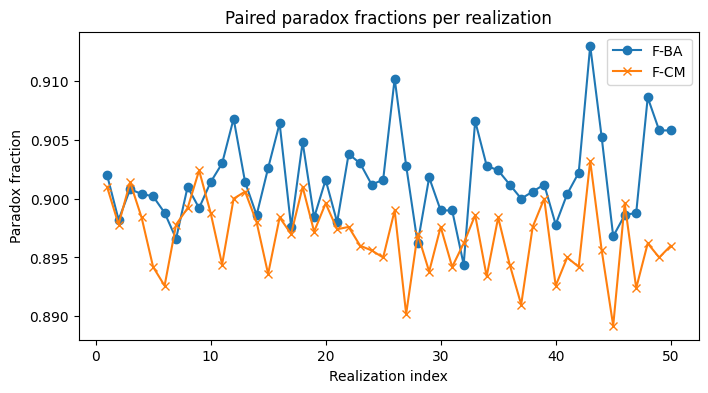

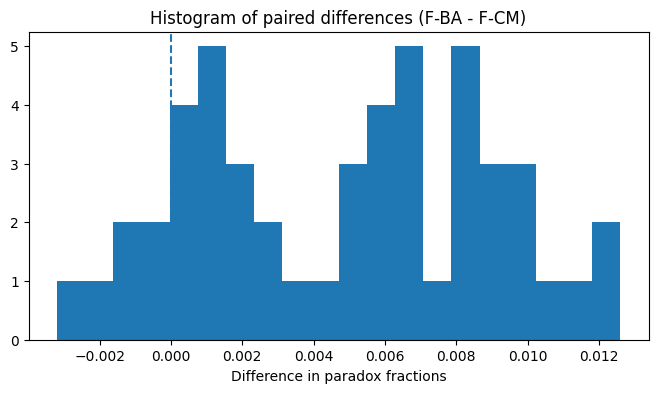

Saved results to: ./data/paired_paradox_results.csv


In [105]:
import numpy as np
import networkx as nx
import random, math, time
import matplotlib.pyplot as plt
import pandas as pd

# -- PARAMETERS (change if you want) --
n = 5000           # number of nodes
m = 3              # BA parameter (edges to attach from a new node to existing nodes)
R = 50             # number of paired realizations (BA + CM per iteration)
n_permutations = 5000  # for paired permutation test
random_seed = 42

# reproducibility
random.seed(random_seed)
np.random.seed(random_seed)

def friendship_paradox_fraction(G):
    paradox_count = 0
    nodes_with_neighbors = 0
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        nodes_with_neighbors += 1
        node_deg = G.degree(node)
        avg_neighbor_deg = sum(G.degree(nb) for nb in neighbors) / len(neighbors)
        if avg_neighbor_deg > node_deg:
            paradox_count += 1
    return paradox_count / nodes_with_neighbors if nodes_with_neighbors > 0 else float('nan')

# run paired experiment
p_ba_list = []
p_cm_list = []
times = []
t0_all = time.time()

for i in range(R):
    t0 = time.time()
    seed1 = random.randint(0, 2**30)
    G_ba = nx.barabasi_albert_graph(n, m, seed=seed1)
    deg_seq = [d for _, d in G_ba.degree()]
    if sum(deg_seq) % 2 != 0:
        deg_seq[random.randint(0, n-1)] += 1
    seed2 = random.randint(0, 2**30)
    G_cm = nx.configuration_model(deg_seq, seed=seed2)

    p_ba = friendship_paradox_fraction(G_ba)
    p_cm = friendship_paradox_fraction(G_cm)

    p_ba_list.append(p_ba)
    p_cm_list.append(p_cm)
    times.append(time.time() - t0)

t_all = time.time() - t0_all

# statistics
p_ba_arr = np.array(p_ba_list)
p_cm_arr = np.array(p_cm_list)
diffs = p_ba_arr - p_cm_arr

def mean_std_ci(x):
    m = np.mean(x)
    s = np.std(x, ddof=1)
    se = s / math.sqrt(len(x))
    ci = (m - 1.96*se, m + 1.96*se)
    return m, s, se, ci

ba_m, ba_s, ba_se, ba_ci = mean_std_ci(p_ba_arr)
cm_m, cm_s, cm_se, cm_ci = mean_std_ci(p_cm_arr)
diff_m, diff_s, diff_se, diff_ci = mean_std_ci(diffs)

# paired permutation test (flip signs of diffs randomly)
obs_mean_diff = np.mean(diffs)
perm_means = np.empty(n_permutations)
for j in range(n_permutations):
    signs = np.random.choice([1, -1], size=len(diffs))
    perm_means[j] = np.mean(diffs * signs)
pval_perm = np.mean(np.abs(perm_means) >= abs(obs_mean_diff))

# prepare results dataframe
df = pd.DataFrame({
    "p_ba": p_ba_list,
    "p_cm": p_cm_list,
    "diff": diffs
})

# display summaries
print("Parameters: n = {}, m = {}, R = {}, permutations = {}".format(n, m, R, n_permutations))
print("\nBA: mean={:.5f}, std={:.5f}, se={:.5f}, 95% CI=({:.5f}, {:.5f})".format(ba_m, ba_s, ba_se, ba_ci[0], ba_ci[1]))
print("CM: mean={:.5f}, std={:.5f}, se={:.5f}, 95% CI=({:.5f}, {:.5f})".format(cm_m, cm_s, cm_se, cm_ci[0], cm_ci[1]))
print("Diff (BA - CM): mean={:.5f}, std={:.5f}, se={:.5f}, 95% CI=({:.5f}, {:.5f})".format(diff_m, diff_s, diff_se, diff_ci[0], diff_ci[1]))
print("\nPaired permutation test (two-sided) p-value for mean difference = {:.5e}".format(pval_perm))
print("\nAverage time per pair: {:.2f} s, total time: {:.2f} s".format(np.mean(times), t_all))

# basic plots
plt.figure(figsize=(8,4))
plt.boxplot([p_ba_arr, p_cm_arr], labels=["F-BA", "F-CM"])
plt.title("Friendship paradox fraction: F-BA vs F-CM (paired realizations)")
plt.ylabel("Fraction of nodes where avg neighbor deg > node deg")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(p_ba_arr, bins=20, alpha=0.7, label="F-BA")
plt.hist(p_cm_arr, bins=20, alpha=0.7, label="F-CM")
plt.legend()
plt.title("Histogram of paradox fractions across realizations")
plt.xlabel("Paradox fraction")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1, R+1), p_ba_arr, marker='o', label='F-BA')
plt.plot(range(1, R+1), p_cm_arr, marker='x', label='F-CM')
plt.legend()
plt.xlabel("Realization index")
plt.ylabel("Paradox fraction")
plt.title("Paired paradox fractions per realization")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(diffs, bins=20)
plt.title("Histogram of paired differences (F-BA - F-CM)")
plt.xlabel("Difference in paradox fractions")
plt.axvline(0, linestyle='--')
plt.show()

# Save CSV of per-realization results
out_csv = "./data/paired_paradox_results.csv"
df.to_csv(out_csv, index=False)
print(f"Saved results to: {out_csv}")

*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

Sune network: 5000 nodes, 14994 edges, 1 connected components
ER network:   5000 nodes, 14729 edges, 14 connected components


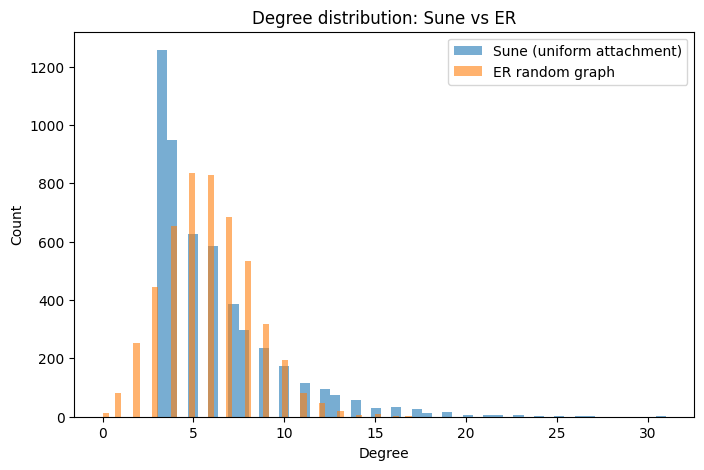

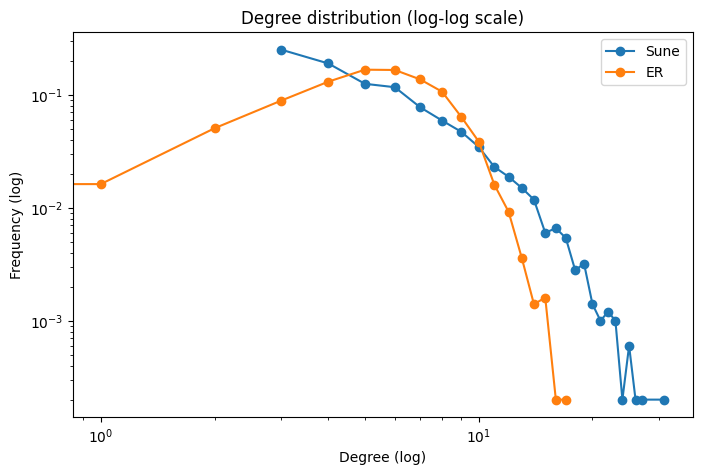

In [106]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters (same as F-BA exercise)
n = 5000   # nodes
m = 3      # edges per new node

# --- 1. Generate Sune-network (growth without preferential attachment) ---
def sune_graph(n, m, seed=None):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
        
    G = nx.Graph()
    # Start with an initial fully connected clique of size m
    G.add_nodes_from(range(m))
    for i in range(m):
        for j in range(i+1, m):
            G.add_edge(i, j)

    # Add nodes sequentially
    for new_node in range(m, n):
        targets = random.sample(list(G.nodes), m)  # pick m existing nodes uniformly at random
        for t in targets:
            G.add_edge(new_node, t)
    return G

G_sune = sune_graph(n, m, seed=42)

# --- 2. Generate ER network with same size and number of edges ---
num_edges = G_sune.number_of_edges()
p_er = (2 * num_edges) / (n * (n-1))  # probability to match expected edges
G_er = nx.erdos_renyi_graph(n, p_er, seed=42)

print(f"Sune network: {n} nodes, {G_sune.number_of_edges()} edges, "
      f"{nx.number_connected_components(G_sune)} connected components")
print(f"ER network:   {n} nodes, {G_er.number_of_edges()} edges, "
      f"{nx.number_connected_components(G_er)} connected components")

# --- 3. Compare degree distributions ---
deg_sune = [d for _, d in G_sune.degree()]
deg_er = [d for _, d in G_er.degree()]

plt.figure(figsize=(8,5))
plt.hist(deg_sune, bins=50, alpha=0.6, label="Sune (uniform attachment)")
plt.hist(deg_er, bins=50, alpha=0.6, label="ER random graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution: Sune vs ER")
plt.legend()
plt.show()

# Log-log plot to highlight tails
plt.figure(figsize=(8,5))
deg_sune_vals, counts_sune = np.unique(deg_sune, return_counts=True)
deg_er_vals, counts_er = np.unique(deg_er, return_counts=True)
plt.loglog(deg_sune_vals, counts_sune / counts_sune.sum(), 'o-', label="Sune")
plt.loglog(deg_er_vals, counts_er / counts_er.sum(), 'o-', label="ER")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")
plt.title("Degree distribution (log-log scale)")
plt.legend()
plt.show()